In [1]:
%run ../setup.ipynb 
%run ../plotting_functions.ipynb



In [2]:
# Setup: Read in the WW3 wave data (assuming NetCDF format and file path)
ww3_file = 'ww3_global_WaveWatch_III_Global_Wave_Model_best.nc'  # Change this to your actual file path
# filePath = os.Path(output_dir,ww3_file)
ds = xr.open_dataset(data_dir / ww3_file)


In [78]:
# add rsl_daily nc file
rsl_file = 'rsl_daily_pacific.nc'  # Change this to your actual file path
ds_rsl = xr.open_dataset(data_dir / rsl_file)


In [79]:
times_to_plot = ['2024-02-11 06:00:00', '2024-03-10 05:00:00','2024-10-19 08:00:00']

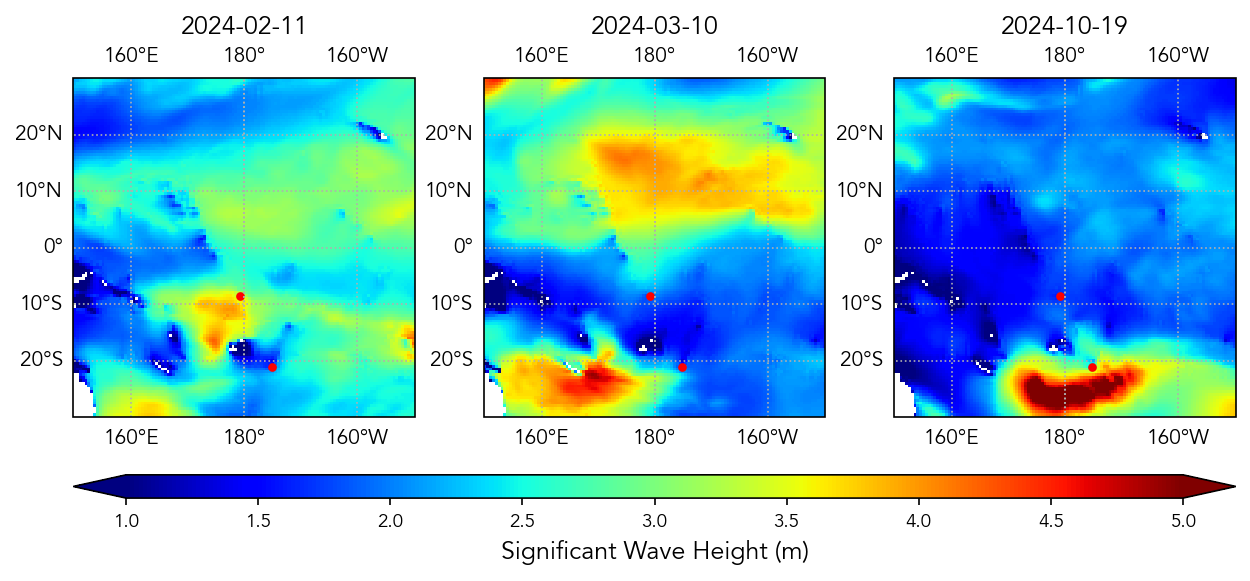

In [80]:
# Example: Plot significant wave height in a map
fig, axs = plt.subplots(
    ncols=len(times_to_plot), 
    figsize=(10, 5), 
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}
)
# Ensure axs is always iterable
if len(times_to_plot) == 1:
    axs = [axs]

da = ds.sel(time=times_to_plot, method='nearest')

vmin = 1
vmax = 5

mappables = []

#make subplots for each time

for i, time in enumerate(times_to_plot):
    # Select the data for the nearest time index
    da_single = ds.sel(time=time, method='nearest')
    ax = axs[i]
    
    mappable = da_single['Thgt'].plot(
        ax=ax,
        x='lon',
        y='lat',
        cmap='jet',
        vmin=vmin,
        vmax=vmax,
        add_colorbar=False, transform=ccrs.PlateCarree()
    )
    mappables.append(mappable)

    gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linestyle=':')
    # Add gridlines and ticks
    latlondx = [10,20]
    lon_ticks = np.arange(-180, 181, latlondx[1])  # Every 20° from -180 to 180
    lat_ticks = np.arange(-90, 91, latlondx[0])  # Every 10° from -90 to 90
    gl.xlocator = plt.FixedLocator(lon_ticks)  # Set longitude tick locations
    gl.ylocator = plt.FixedLocator(lat_ticks)  # Set latitude tick locations    
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}

    # Format the time for the title (shorten to date only)
    time_str = pd.to_datetime(da_single['time'].values).strftime('%Y-%m-%d')
    ax.set_title(f'{time_str}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # change lat limits to be 30N 30S
    ax.set_ylim(-30, 30)

    # add lat/lon of rsl_daily locations
    rsl_lon = ds_rsl['lon'].values
    rsl_lat = ds_rsl['lat'].values
    ax.scatter(rsl_lon, rsl_lat, color='red', marker='o', s=10, label='RSL Locations', transform=ccrs.PlateCarree())

# Add a colorbar for all subplots
cbar = fig.colorbar(mappables[0], ax=axs, orientation='horizontal', pad=0.1, aspect=50, extend='both')
cbar.set_label('Significant Wave Height (m)')

# plt.tight_layout()
plt.show()

In [64]:
# download all time steps from https://pae-paha.pacioos.hawaii.edu/erddap/griddap/ww3_global.htmlTable?Tdir%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,Tper%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,Thgt%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,sdir%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,sper%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,shgt%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,wdir%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,wper%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,whgt%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D

url = 'https://pae-paha.pacioos.hawaii.edu/erddap/griddap/ww3_global.htmlTable?Tdir%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,Tper%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,Thgt%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,sdir%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,sper%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,shgt%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,wdir%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,wper%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D,whgt%5B(2024-02-01):1:(2024-04-01)%5D%5B(0.0):1:(0.0)%5D%5B(-8.5):1:(-8.5)%5D%5B(179):1:(179)%5D'

savepath = os.path.join(data_dir, 'ww3_tuvalu.nc')
urlretrieve(url, savepath)

('/Users/juliafiedler/Documents/SL_Hawaii_data/data/ww3_tuvalu.nc',
 <http.client.HTTPMessage at 0x1099e0160>)